<a href="https://colab.research.google.com/github/cerezamo/NLP_brouillon/blob/master/CamemBERT_huggingface_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy 
import numpy as np 
import pandas as pd 
import os 
os.getcwd()
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import tensorflow as tf
# GPU a activer 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
#En fait je fais à la main
from fastai.text import *
from fastai.metrics import *

In [4]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Using TensorFlow backend.


In [5]:
device = torch.device("cuda")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P4'

In [6]:
! pip install transformers

     |████████████████████████████████| 501kB 8.5MB/s 
     |████████████████████████████████| 3.7MB 21.6MB/s 
     |████████████████████████████████| 870kB 53.5MB/s 
     |████████████████████████████████| 1.0MB 50.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=52162468f28ccd12bb9316a4623fc33f1c53b271a885c3670f518d3c08bb8c81
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [0]:
import transformers

In [0]:
df=pd.read_csv('/content/gdrive/My Drive/NLP_M&Ms/minimal_df.csv')

In [20]:
df.head()

,Unnamed: 0,Id,Titre,Type,Theme,Prenom,Nom,Fonction,Date,Tags,Texte,Lien,sexe
0,0,181873,"Déclaration de M. Luc Chatel, ministre de l'éd...",déclaration,Institutions,Luc,Chatel,NaN,2011-04-04T12:00:00Z,"Justice - Droits fondamentaux,Laïcité",GUILLAUME DURAND Michaël DARMON de vous recevo...,https://www.vie-publique.fr/discours/181873-de...,1
1,1,182980,"Déclaration de M. Frédéric Mitterrand, ministr...",déclaration,Société,Frédéric,Mitterrand,NaN,2011-09-10T12:00:00Z,"Culture - Médias,Télévision",Je suis très heureux de vous retrouver pour ce...,https://www.vie-publique.fr/discours/182980-de...,1
2,2,146465,"Discours de M. Jacques Chirac, Président de la...",discours,NaN,Jacques,Chirac,NaN,1998-11-16T12:00:00Z,NaN,"Monsieur le Président du Congrès national, Mes...",https://www.vie-publique.fr/discours/146465-di...,1
3,3,205751,"Déclaration de M. Emmanuel Macron, Président d...",déclaration,International,Emmanuel,Macron,NaN,2018-05-10T12:00:00Z,"Union européenne,Construction européenne","Madame la Chancelière,chère Angela,merci beauc...",https://www.vie-publique.fr/discours/205751-de...,1
4,4,138765,"Déclaration de M. Patrick Devedjian, ministre ...",déclaration,Société,Patrick,Devedjian,NaN,2003-06-10T12:00:00Z,"Education - Recherche,Histoire",Le souvenir des grandes persécutions ne se pe...,https://www.vie-publique.fr/discours/138765-de...,1


In [0]:

df=df[1:]
df=df.sample(frac=1)
df.sexe=df.sexe.replace(1,0)
df.sexe=df.sexe.replace(2,1)
df.Texte = df.Texte.apply(lambda x : x.replace('\xa0','').replace('\x85','').replace('\x96','').replace('\x92',"'").replace('\x80','').replace("\'","'"))

In [0]:

def cleanText(x):

    """

        Fonction permettant de nettoyer et de tokenizer un texte
    """
    import string
    x = x.replace('  ','')
    return x
df.Texte = df.Texte.apply(cleanText)

In [0]:
from transformers import CamembertModel

In [30]:
camembert = CamembertModel.from_pretrained('camembert-base')

In [0]:
sentences = df.Texte.values

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + ' ' + sentence + " [SEP]" for sentence in sentences]
labels = df.sexe.values

In [27]:
sentences[0]

'[CLS]  Chers amis,Chers compagnons, Dans quelques instants, vous allez, nous allons choisir notre destin. Il ne s\'agit pas d\'un choix anodin.C\'est pourquoi, après cette matinée de travail et d\'échange je souhaite vous dire quels sont les enjeux, tous les enjeux du vote auquel nous allons procéder ensemble pendant le déjeuner.Vous le sentez bien, en cet instant, mon émotion est profonde. Je sais qu\'elle vous étreint aussi.Nous avons tant partagé : - les larmes de l\'échec autant que les rires de la victoire,- les sourires des temps faciles et plus encore, les efforts des jours de tempête, où se forge, chez nous Gaullistes, l\'essentiel de nos valeurs et la force de nos tempéraments.Et puis, s\'imposent à nous, joyeuses et fraternelles, les images de ces soirées de liesse, celle de 1995 où, après deux décennies l\'un des nôtres est revenu à l\'Élysée, celle du mois de mai dernier où l\'on a vu se marier la grandeur de nos idées et l\'universalité des valeurs de notre pays.Oui, cher

Tokenization 

In [0]:
from transformers import CamembertTokenizer

In [38]:
tokenizer = CamembertTokenizer.from_pretrained('camembert-base', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

Tokenize the first sentence:
['▁[', 'cl', 's', ']', '▁chers', '▁amis', ',', 'cher', 's', '▁compagnons', ',', '▁dans', '▁quelques', '▁instants', ',', '▁vous', '▁allez', ',', '▁nous', '▁allons', '▁choisir', '▁notre', '▁destin', '.', '▁il', '▁ne', '▁s', "'", 'agit', '▁pas', '▁d', "'", 'un', '▁choix', '▁anodin', '.', 'c', "'", 'est', '▁pourquoi', ',', '▁après', '▁cette', '▁matinée', '▁de', '▁travail', '▁et', '▁d', "'", 'échange', '▁je', '▁souhaite', '▁vous', '▁dire', '▁quels', '▁sont', '▁les', '▁enjeux', ',', '▁tous', '▁les', '▁enjeux', '▁du', '▁vote', '▁auquel', '▁nous', '▁allons', '▁procéder', '▁ensemble', '▁pendant', '▁le', '▁déjeuner', '.', 'vous', '▁le', '▁sentez', '▁bien', ',', '▁en', '▁cet', '▁instant', ',', '▁mon', '▁émotion', '▁est', '▁profonde', '.', '▁je', '▁sais', '▁qu', "'", 'elle', '▁vous', '▁é', 'tre', 'int', '▁aussi', '.', 'nous', '▁avons', '▁tant', '▁partagé', '▁:', '▁-', '▁les', '▁larmes', '▁de', '▁l', "'", 'échec', '▁autant', '▁que', '▁les', '▁rire', 's', '▁de', '▁la', '

Tokenization spéciale ? : Dans la doc on trouve : ' This uses a greedy longest-match-first algorithm to perform tokenization using the  given vocabulary '

COmme BERT n'est pas fait pour avoir plusieurs phrases, on met tout le texte comme une phrase. En renvanche il y a une longueur maximale à fixer. 


In [39]:
#21 000 tokens pour le max.... Comment on fait ? 
len(max(tokenized_texts, key=len)),len(min(tokenized_texts, key=len))

(19126, 79)

In [0]:
# VOila donc on est limité à 512 tokens... Embêtant je sais pas comment faire 
# Mon idée c'est que pour l'instant on le laisse tronquer et padder tant pis. Si on arrive pas à de bons résultats on split les discours en plusieurs on les labellise et on fera la moyenne des prédictions sur chaque bout de texte
MAX_LEN = 512

In [0]:
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [0]:
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [0]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [0]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [0]:

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [0]:
batch_size = 2

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [0]:
from transformers import CamembertForSequenceClassification

In [50]:
model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=2)
model.cuda()

CamembertForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNo

In [0]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [0]:
from transformers import AdamW

In [0]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = AdamW(optimizer_grouped_parameters,
                     lr=0.001, correct_bias=False
                     ) # 4e-5
# ICI correct bias = False pour garder la même chose 

In [0]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [63]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
t = [] 

# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 10

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]
    #TRANSFORMERS CHANGE encore 
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      loss_a, logits = outputs[:2]
      #logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      # TRANSFORMERS CHANGE
    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))


Epoch:  10%|█         | 1/10 [01:10<10:31, 70.17s/it]

Train loss: 0.02730114526218838
Validation Accuracy: 0.68



Epoch:  20%|██        | 2/10 [02:20<09:22, 70.26s/it]

Train loss: 0.045103033781051634
Validation Accuracy: 0.32



Epoch:  30%|███       | 3/10 [03:31<08:12, 70.33s/it]

Train loss: 0.02041993372970157
Validation Accuracy: 0.68



Epoch:  40%|████      | 4/10 [04:41<07:02, 70.38s/it]

Train loss: 0.018114217122395835
Validation Accuracy: 0.32



Epoch:  50%|█████     | 5/10 [05:52<05:52, 70.40s/it]

Train loss: 0.007528811825646294
Validation Accuracy: 0.68



Epoch:  60%|██████    | 6/10 [07:02<04:41, 70.42s/it]

Train loss: 0.000806167655520969
Validation Accuracy: 0.68



Epoch:  70%|███████   | 7/10 [08:13<03:31, 70.44s/it]

Train loss: 0.0005724170472886827
Validation Accuracy: 0.68



Epoch:  80%|████████  | 8/10 [09:23<02:20, 70.45s/it]

Train loss: 0.000480905638800727
Validation Accuracy: 0.68



Epoch:  90%|█████████ | 9/10 [10:33<01:10, 70.46s/it]

Train loss: 0.00044200738271077476
Validation Accuracy: 0.68



Epoch: 100%|██████████| 10/10 [11:44<00:00, 70.47s/it]


Train loss: 0.00033781528472900393
Validation Accuracy: 0.68


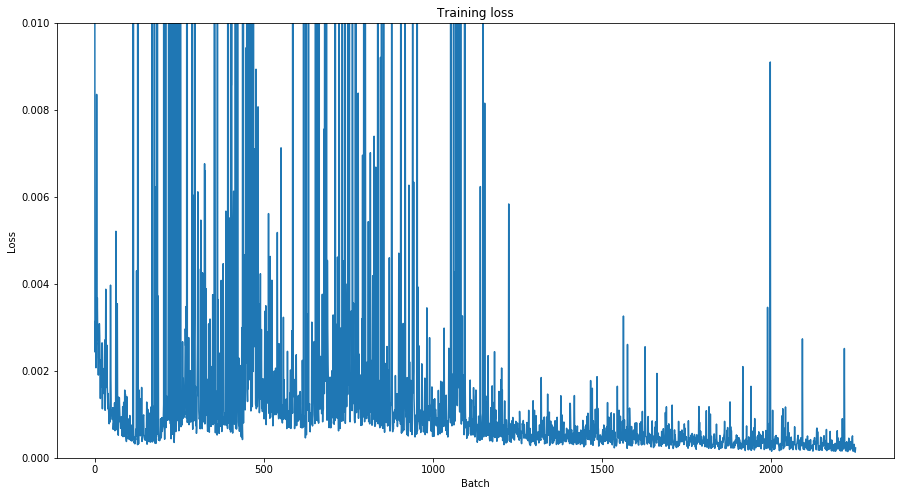

In [69]:
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.ylim((0,0.01))
plt.plot(train_loss_set)
plt.show()
# Ca converge bien sur le train mais dans le valid il doit y avoir peu d'exemple de femme